In [9]:
import math
import torch
%matplotlib inline

import glob

import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.transforms import transforms as T
from torchvision.transforms.functional import to_pil_image

from inpainting.load import VideoDataset, MergeDataset

In [10]:
input_images_dataset = VideoDataset(
    list(glob.glob(f'../data/interim/demo/ResizedJPEGImages/*')),
    'image'
)
input_masks_dataset = VideoDataset(
    list(glob.glob(f'../data/interim/demo/ResizedMasks/*')),
    'mask'
)
dataset = MergeDataset([input_images_dataset, input_masks_dataset], transform=T.ToTensor())

torch.Size([3, 256, 256])


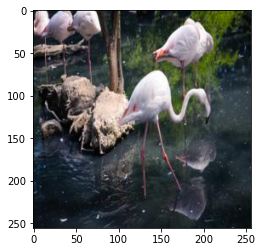

In [11]:
images, masks = dataset[1]
image_1 = images[10]
image_2 = images[11]
print(image_1.size())
plt.imshow(to_pil_image(image_1))
plt.imshow(to_pil_image(image_2))

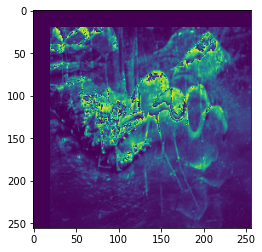

In [12]:
from spatial_correlation_sampler import SpatialCorrelationSampler
corr = SpatialCorrelationSampler(
    kernel_size=1,
    patch_size=21,
    stride=1,
    padding=0,
    dilation_patch=2
)


a = image_1.unsqueeze(0).cuda()
b = image_2.unsqueeze(0).cuda()

c = corr(a, b)
plt.imshow(to_pil_image(c[0, 0, 0].cpu()))

In [13]:
corr(a, b) == corr(b, a)

tensor([[[[[ True,  True,  True,  ...,  True,  True,  True],
           [ True,  True,  True,  ...,  True,  True,  True],
           [ True,  True,  True,  ...,  True,  True,  True],
           ...,
           [ True,  True,  True,  ..., False, False, False],
           [ True,  True,  True,  ..., False, False, False],
           [ True,  True,  True,  ..., False, False, False]],

          [[ True,  True,  True,  ...,  True,  True,  True],
           [ True,  True,  True,  ...,  True,  True,  True],
           [ True,  True,  True,  ...,  True,  True,  True],
           ...,
           [ True,  True,  True,  ..., False, False, False],
           [ True,  True,  True,  ..., False, False, False],
           [ True,  True,  True,  ..., False, False, False]],

          [[ True,  True,  True,  ...,  True,  True,  True],
           [ True,  True,  True,  ...,  True,  True,  True],
           [ True,  True,  True,  ...,  True,  True,  True],
           ...,
           [ True,  True,  True, 